In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Diabetes.csv')

In [ ]:
data.columns

Index(['pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi',
       'dpf', 'age', 'diabetes'],
      dtype='object')

In [ ]:
X = data[[ 'pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi',
       'dpf', 'age'              ]]

y = data[       'diabetes'          ]

In [ ]:
X = data.drop('diabetes', axis=1)
y = data['diabetes']

In [ ]:
X.shape, y.shape

((768, 8), (768,))

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()

In [ ]:
sc.fit(X)

StandardScaler()

In [ ]:
X = sc.transform(X)

In [ ]:
X = sc.fit_transform(X)

In [ ]:
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(9, input_dim=8, activation="relu"))
model.add(Dense(12, activation="relu"))
model.add(Dense(12, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [ ]:
from keras.models import Sequential

from keras.layers import Dense

model = Sequential()

model.add(Dense(9, input_dim = 8, activation= 'relu'))

model.add(Dense(12, activation = 'relu'))

model.add(Dense(14, activation = 'relu'))


model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 9)                 81        
                                                                 
 dense_5 (Dense)             (None, 12)                120       
                                                                 
 dense_6 (Dense)             (None, 14)                182       
                                                                 
 dense_7 (Dense)             (None, 1)                 15        
                                                                 
Total params: 398
Trainable params: 398
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X,y, epochs=100, batch_size=100)

Epoch 1/100
8/8 [==============================] - 1s 3ms/step - loss: 0.7113 - accuracy: 0.6510
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6969 - accuracy: 0.6510
Epoch 3/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6839 - accuracy: 0.6510
Epoch 4/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6737 - accuracy: 0.6523
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6635 - accuracy: 0.6536
Epoch 6/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6537 - accuracy: 0.6576
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6432 - accuracy: 0.6589
Epoch 8/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6328 - accuracy: 0.6693
Epoch 9/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6222 - accuracy: 0.6732
Epoch 10/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6106 - accuracy: 0.6862
Epoch 11/100
8/8 [===========

In [ ]:
score = model.evaluate(X, y, verbose = 0)
print(score)

[0.4142182171344757, 0.7864583134651184]


In [ ]:
y_pred = model.predict(X)

In [ ]:
y_pred[:10]

array([[0.69417393],
       [0.01453763],
       [0.81747425],
       [0.01078859],
       [0.8179955 ],
       [0.11498937],
       [0.01201501],
       [0.65420175],
       [0.75765264],
       [0.1415542 ]], dtype=float32)

In [ ]:
import numpy as np
y_pred = y_pred.round()
# (y_pred > .5).astype(int)

In [ ]:
y_pred[:10]

array([[1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.]], dtype=float32)

In [ ]:
# Import the modules from `sklearn.metrics`
from sklearn.metrics import confusion_matrix, classification_report, cohen_kappa_score

In [ ]:
# Confusion matrix
confusion_matrix(y, y_pred)

array([[433,  67],
       [ 97, 171]])

In [ ]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       500
           1       0.72      0.64      0.68       268

    accuracy                           0.79       768
   macro avg       0.77      0.75      0.76       768
weighted avg       0.78      0.79      0.78       768



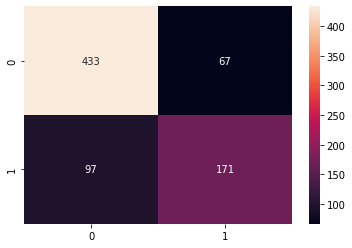

In [ ]:
import seaborn as sns
sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt = '1d')

In [ ]:
#The Kappa or Cohen’s kappa is the classification accuracy normalized by the imbalance of the classes in the data.
cohen_kappa_score(y, y_pred)

0.5174992338338952

# Iris

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [ ]:
iris = datasets.load_iris()

In [ ]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [ ]:
X = iris.data 
y = iris.target

In [ ]:
X.shape, y.shape

((150, 4), (150,))

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()

In [ ]:
sc.fit(X)

StandardScaler()

In [ ]:
X = sc.transform(X)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
y = le.fit_transform(y)

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
y = pd.get_dummies(y)

In [ ]:
y

,0,1,2
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [ ]:
X.shape, y.shape

((150, 4), (150, 3))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(5, input_dim=4, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(5, activation="relu"))
model.add(Dense(3, activation="softmax"))

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
model.fit(X,y, epochs=500, batch_size=25)

In [ ]:
score = model.evaluate(X, y, verbose = 0)
print(score)

[0.1984221339225769, 0.9800000190734863]


In [ ]:
y_pred = model.predict(X)
y_pred = y_pred.argmax(axis=-1)
y_pred.shape

(150,)

In [ ]:
y = iris.target
y.shape

(150,)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y, y_pred)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  1, 49]])

In [ ]:
y_predict = model.predict(X)

In [ ]:
y_predict.shape

(150, 3)

In [ ]:
y_pred = model.predict(X)
y_pred = y_pred.argmax(axis=-1)

In [ ]:
y_pred.shape

(150,)

In [ ]:
y.shape

(150, 3)

In [ ]:
y = iris.target

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 0, 2, 1, 1, 2, 1, 2, 1, 2,
       1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
# Import the modules from `sklearn.metrics`
from sklearn.metrics import confusion_matrix, classification_report, cohen_kappa_score

In [ ]:
# Confusion matrix
confusion_matrix(y, y_pred)

array([[50,  0,  0],
       [ 1, 27, 22],
       [ 0,  3, 47]])

In [ ]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        50
           1       0.90      0.54      0.68        50
           2       0.68      0.94      0.79        50

    accuracy                           0.83       150
   macro avg       0.85      0.83      0.82       150
weighted avg       0.85      0.83      0.82       150



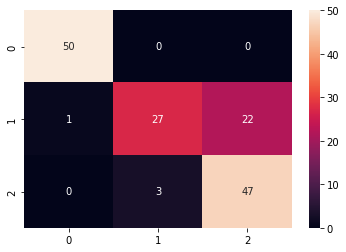

In [ ]:
import seaborn as sns
sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt = '1d');